Франков Олексій, ПС-4, ФКНК

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

Дивимось на дані

In [4]:
data.head()

x           y  color
0  177.958945   80.102851      0
1  115.441607   83.274091      0
2  149.713882   96.694476      0
3  145.250787  144.084768      0
4  184.746985   89.926839      0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3259 non-null   float64
 1   y       3259 non-null   float64
 2   color   3259 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 76.5 KB


In [7]:
data.describe()

x            y        color
count  3259.000000  3259.000000  3259.000000
mean    689.976467   396.063761     5.969623
std     337.707998   186.093478     4.743902
min      92.543566    38.879387     0.000000
25%     382.964236   209.309841     1.000000
50%     702.861759   466.986785     7.000000
75%     975.742935   552.159124    12.000000
max    1248.825198   710.235121    12.000000

Прибираємо мітки

In [8]:
data.drop(["color"],axis=1,inplace=True)

In [9]:
data.head()

x           y
0  177.958945   80.102851
1  115.441607   83.274091
2  149.713882   96.694476
3  145.250787  144.084768
4  184.746985   89.926839

Виводимо діаграму розсіювання

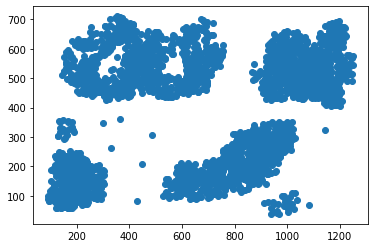

In [10]:
plt.scatter(x=data["x"], y = data["y"])

In [11]:
X = data.to_numpy()

# Власний метод К-середніх

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    """Евклідова відстань"""
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K=5, max_iters=100):
        """Ініціалізація моделі"""
        self.K = K
        self.max_iters = max_iters

        # список індексів спостережень для кожного кластеру
        self.clusters = [[] for _ in range(self.K)]

        # центроїди кластерів (середні кластерів)
        self.centroids = []


    def fit_predict(self, X):
        """Кластеризація"""

        self.X = X
        self.n_samples, self.n_features = X.shape

        # ініціалізація цетроїдів
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # оптиммізація кластерів
        for _ in range(self.max_iters):
            # відносимо спостереження до ближчих центроїдів
            self.clusters = self._create_clusters(self.centroids)

            # Розраховуємо нові центроїди
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # перевіряємо критерій зупинки
            if self._is_converged(centroids_old, self.centroids):
                break


        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        """визначаємо спостереження номером їх кластеру"""
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        """відносимо спостереження до ближчих центроїдів"""
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        """визначаємо найближчий центроїд для спостереження"""
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        """перераховуємо центроїди по кластерам"""
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        """критерій зупинки"""
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def inertia(self):
        """загальна внутрішньокластерна дисперсія"""
        res = 0
        labels = self._get_cluster_labels(self.clusters)
        for i in range(len(self.centroids)):
            res += sum(euclidean_distance(sample, self.centroids[i]) for sample in self.X[labels==i])
        return res
                
    def plot(self):
        """відображення кластерів з центроїдами"""
        fig, ax = plt.subplots(figsize=(12, 8))


        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

In [13]:
def plot_elbow(X, Max = 10):
    """Графік методу ліктя для підбору кількості кластерів"""
    points = []
    nums = range(1, Max)
    for i in nums:
        K_i = KMeans(K=i)
        K_i.fit_predict(X)
        points.append(K_i.inertia())
    plt.plot(nums, points)

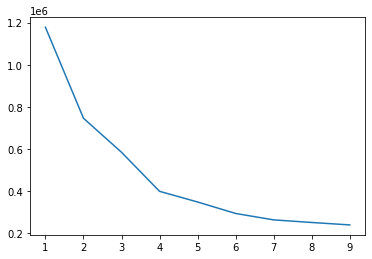

In [14]:
plot_elbow(X) #виводимо графік

Обираємо кількість кластерів 4

In [13]:
K_M = KMeans(K=4) #створюємо модель
K_M.fit_predict(X) #кластеризація вибірки
K_M.plot() #побудова діаграми результату кластеризації

# Бібліотечні методи кластеризації

# Метод К-середніх

In [14]:
from sklearn.cluster import KMeans
K = 4
kmeans = KMeans(n_clusters = K, random_state = 0, n_init='auto') #створюємо модель
y = kmeans.fit_predict(X) #кластеризація вибірки

In [15]:
def plot_func(X, y, K):
    """функція для виведення кластерів"""
    fig, ax = plt.subplots(figsize=(12, 8))
    for k in range(K):
        ax.scatter(X[y == k, 0], X[y == k, 1])

In [16]:
plot_func(X,y,K) #виводимо кластери

# Агломеративна кластеризація

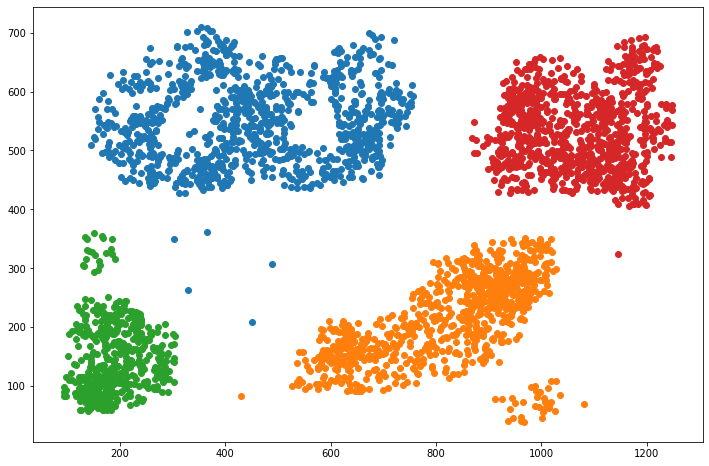

In [17]:
from sklearn.cluster import AgglomerativeClustering
Ag_Cl = AgglomerativeClustering(n_clusters = K) #створюємо модель
y_ag = Ag_Cl.fit_predict(X) #кластеризація вибірки
plot_func(X,y_ag, K) #виводимо кластери

# BIRCH кластеризація

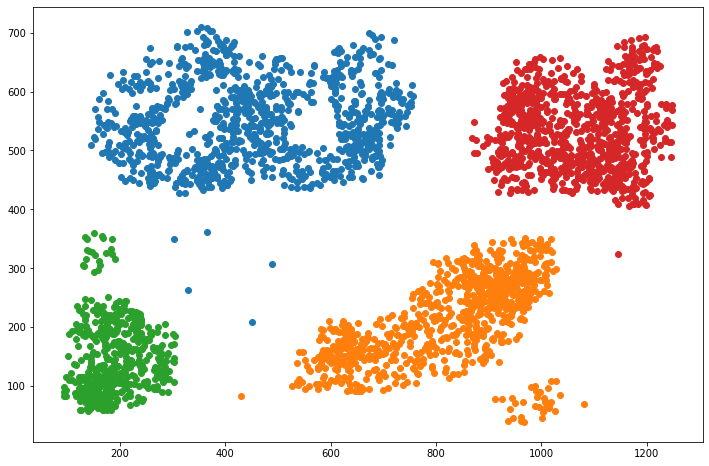

In [18]:
from sklearn.cluster import Birch
B = Birch(n_clusters=K) #створюємо модель
y_B = B.fit_predict(X) #кластеризація вибірки
plot_func(X,y_B, K) #виводимо кластери